- **Overfitting** : Algorithms work well on training set, but when used with new data they make lots of mistakes
- **Regularization** : technique to reduce overfitting; add additional constraint to cost function thats independent of all feature values

#### Types of regularizors
- **L1 regularization** : adds term to scoring function that's proportional to sum of all absolute weight values. Based on L1 norm of weight vector. aka **Lasso Regression**.
- **L2 regularization** : adds term to scoring function thats proportional to sum of all squared weight values. Based on the L2 norm of the weight vector. aka **Ridge Regression**.
    - B/c L2 norm uses squaring function, it punishes strong outliers in weight vector harder than L1 norm

In [2]:
# Imports
import numpy as np
from sklearn import linear_model

In [3]:
# Normal linear regression
lin_reg = linear_model.LinearRegression()

# Lasso regression
lasso_reg = linear_model.Lasso()

# Ridge regression
ridge_reg = linear_model.Ridge()

#### Testing Regularization on Boston Dataset

In [4]:
# Imports
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
boston = datasets.load_boston()
print('Data shape: ', boston.data.shape)
print('Target shape: ', boston.target.shape)
print('Descr: ', boston.DESCR)

Data shape:  (506, 13)
Target shape:  (506,)
Descr:  Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000


In [6]:
# Split data into train and test sets
lasso_x_train, lasso_x_test, lasso_y_train, lasso_y_test = modsel.train_test_split(boston.data, boston.target, test_size=.1, random_state=42)
ridge_x_train = lasso_x_train[:] 
ridge_x_test = lasso_x_test[:]
ridge_y_train = lasso_y_train[:]
ridge_y_test = lasso_y_test[:]

#### Train Lasso Regression 

In [7]:
# Train
lasso_reg.fit(lasso_x_train, lasso_y_train)
lasso_mean_squared_err = metrics.mean_squared_error(lasso_y_train, lasso_reg.predict(lasso_x_train))
lasso_var = lasso_reg.score(lasso_x_train, lasso_y_train)
print('Mean squared err: ', lasso_mean_squared_err)
print('R^2: ', lasso_var)

Mean squared err:  27.6095777689
R^2:  0.68127262322


#### Train Ridge Regression 

In [8]:
# Train
ridge_reg.fit(ridge_x_train, ridge_y_train)
ridge_mean_sqr_err = metrics.mean_squared_error(ridge_y_train, ridge_reg.predict(ridge_x_train))
ridge_r2 = ridge_reg.score(ridge_x_train, ridge_y_train)
print('Mean squared err: ', ridge_mean_sqr_err)
print('R^2: ', ridge_r2)

Mean squared err:  22.9264245005
R^2:  0.735335353509


#### Testing the model
To test generalization performance of the model, calculate mean squared error on test data

In [22]:
lasso_test_y_predict = lasso_reg.predict(lasso_x_test)
lasso_test_mse = metrics.mean_squared_error(lasso_y_test, lasso_test_y_predict)
print('Lasso Mean Squared Error: ', lasso_test_mse)

ridge_test_y_predict = ridge_reg.predict(ridge_x_test)
ridge_test_mse = metrics.mean_squared_error(ridge_y_test, ridge_test_y_predict)
print('Ridge Mean Squared Error: ', ridge_test_mse)

Lasso Mean Squared Error:  18.6605423459
Ridge Mean Squared Error:  14.7858889412


#### Plotting on the map

Text(0,0.5,'Target value')

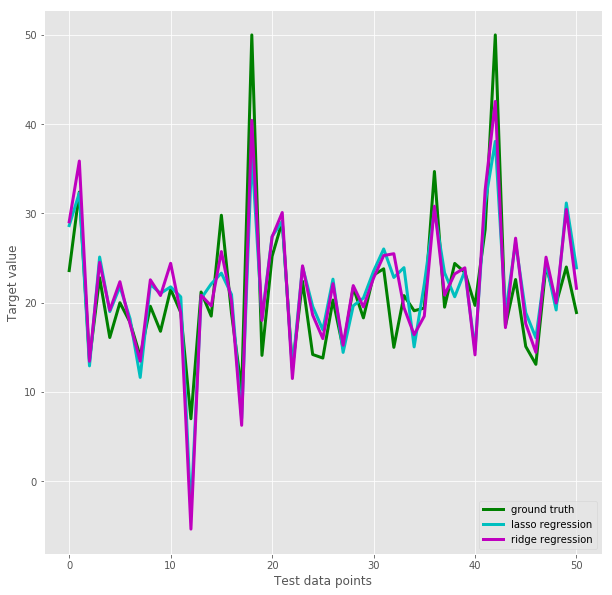

In [25]:
plt.figure(figsize=(10,10))
plt.plot(lasso_y_test, linewidth=3, c='g', label='ground truth')
plt.plot(lasso_test_y_predict, linewidth=3, c='c', label='lasso regression')
plt.plot(ridge_test_y_predict, linewidth=3, c='m', label='ridge regression')

plt.legend(loc='lower right')
plt.xlabel('Test data points')
plt.ylabel('Target value')